# Structures, Brillouin zones, and cut-planning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import packages
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import peaks as pks
import os
import pint_xarray

# Set default options
xr.set_options(cmap_sequential='Purples', keep_attrs=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Set the default file path
pks.opts.FileIO.path = os.getenv('PEAKS_EXAMPLE_DATA_PATH')

In [3]:
atoms = pks.load('RuO2.cif')

/Users/pdk6/miniconda3/envs/peaks-dev/lib/python3.12/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(136, setting=1). This may result in wrong setting!
  warnings.warn(


In [5]:
atoms

Atoms(symbols='Ru2O4', pbc=True, cell=[4.4968, 4.4968, 3.1049], spacegroup_kinds=...)

In [3]:
import ase, ase.io, ase.visualize, ase.build

In [ ]:
atoms = ase.io.read(os.path.join(pks.opts.FileIO.path, 'RuO2.cif'))

/Users/pdk6/miniconda3/envs/peaks-dev/lib/python3.12/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(136, setting=1). This may result in wrong setting!
  warnings.warn(


In [54]:
lattice = ase.lattice.TET(2,6)

In [64]:
graphene = ase.build.graphene(formula='C2', a=2.46, thickness=0.0, size=(1, 1, 1), vacuum=None)

In [86]:
cell = lattice.tocell()

In [90]:
cell.reciprocal()

Cell([0.5, 0.5, 0.16666666666666666])

In [88]:
lattice.get_special_points()

{'G': array([0, 0, 0]),
 'A': array([0.5, 0.5, 0.5]),
 'M': array([0.5, 0.5, 0. ]),
 'R': array([0. , 0.5, 0.5]),
 'X': array([0. , 0.5, 0. ]),
 'Z': array([0. , 0. , 0.5])}

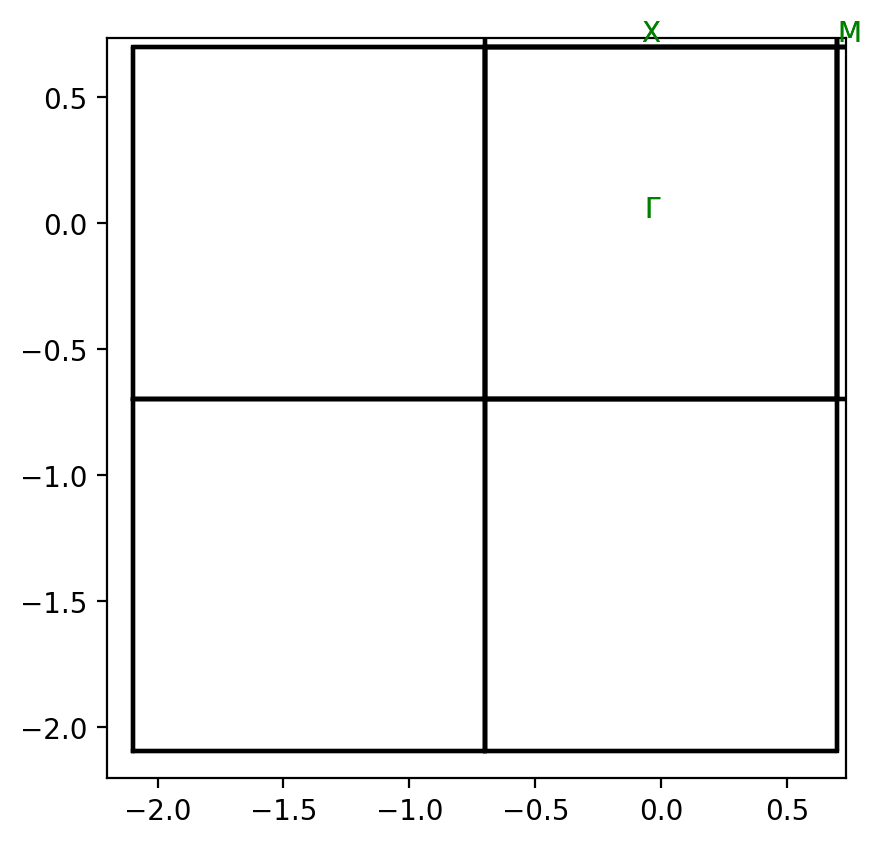

In [115]:
plot_bz(atoms, surface=(0,0,1), repeat=(2,2), show_axes=True)
plot_bz(atoms, surface=(0,0,1), repeat=(-2,-2), show_axes=True)


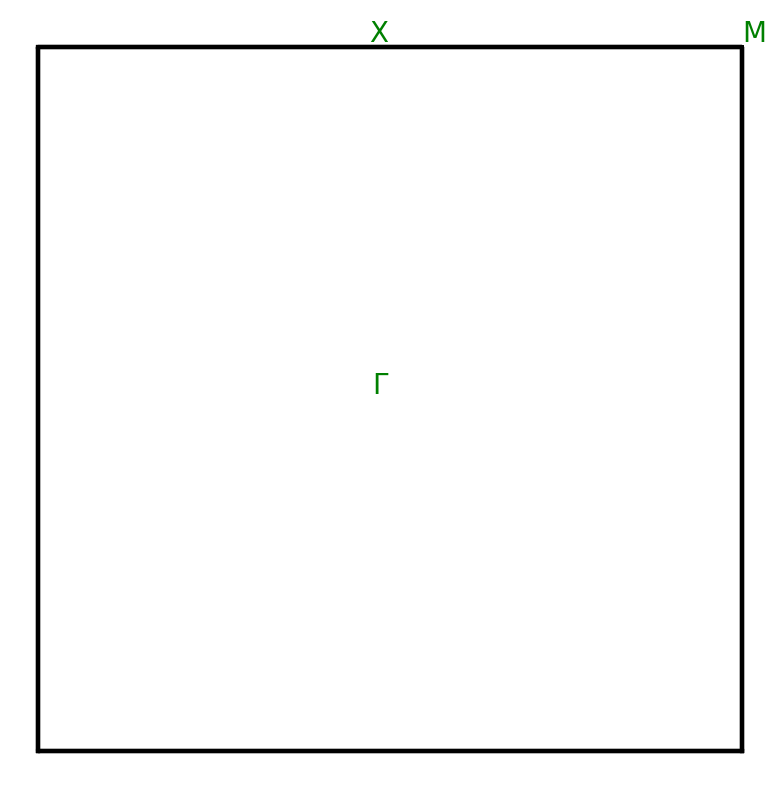

In [63]:
plot_bz(lattice, surface=(0,0,1))

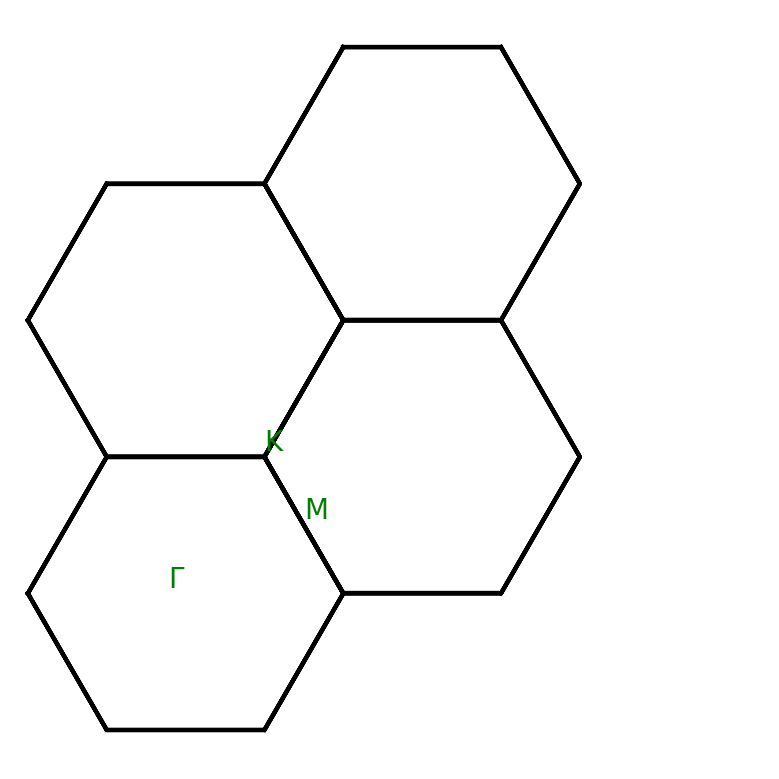

In [77]:
plot_bz(graphene, repeat=(2,2))

In [ ]:
b.

In [22]:
dir(atoms.cell.get_bravais_lattice().tocell())

['T',
 '__abs__',
 '__add__',
 '__array__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imatmul__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 'all',
 'angles',
 'any',
 'area',
 'areas',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'array',
 'ascell',
 'ase_objtype',
 'astype',
 'bandpath',
 'base',
 'byteswap',
 'cartesian_positions',
 'cellpar',
 'cho

In [43]:
ase.build.graphene(formula='C2', a=2.46, thickness=0.0, size=(1, 1, 1), vacuum=None)

Atoms(symbols='C2', pbc=[True, True, False], cell=[[2.46, 0.0, 0.0], [-1.23, 2.130422493309719, 0.0], [0.0, 0.0, 0.0]])

In [ ]:
from peaks.bz.plotting import plot_bz

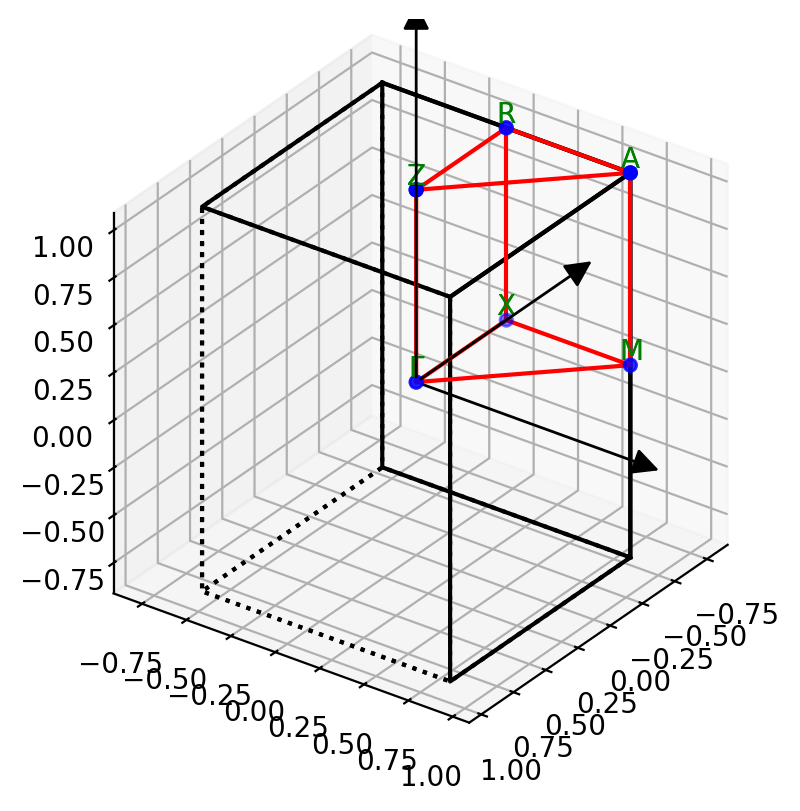

In [16]:
plot_bz(atoms,  path=None, vectors=True, rotate=90, show_axes=True,)

<Axes: >

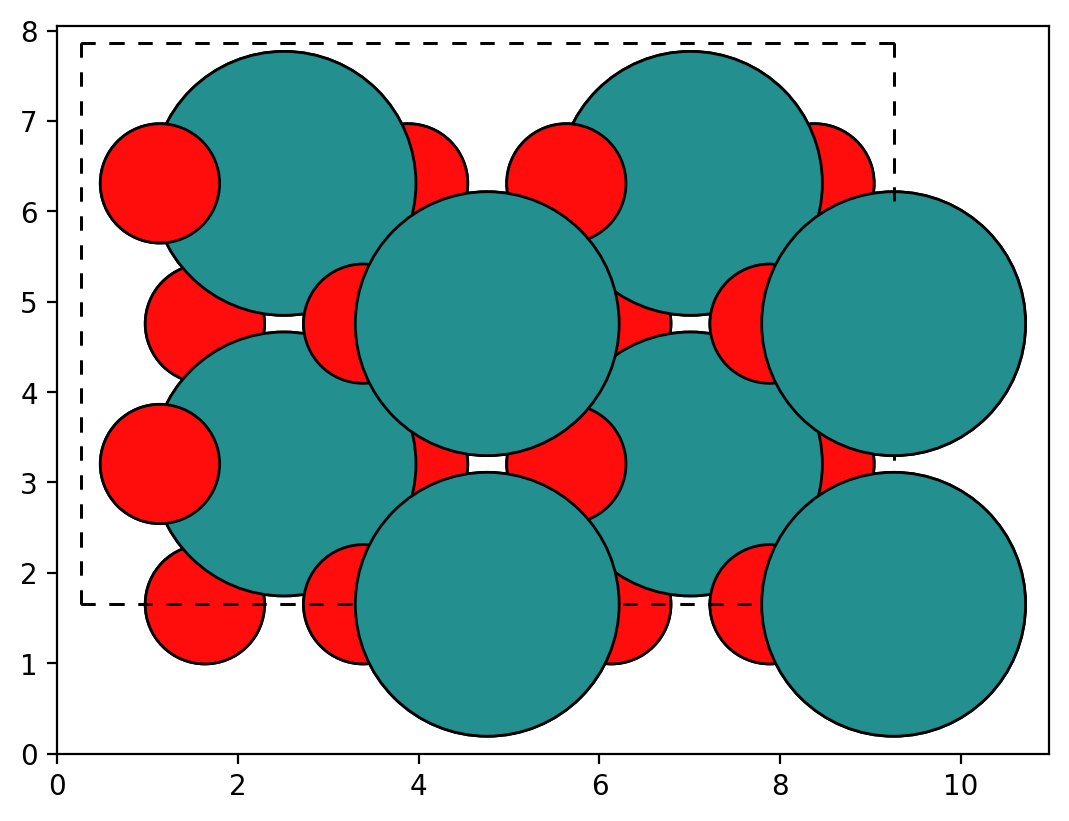

In [4]:
import ase.visualize.plot
sc = ase.build.supercells.make_supercell(atoms, np.identity(3)*2)
ase.visualize.plot.plot_atoms(sc, rotation='0x,90y,90z')

In [6]:
ase.visualize.view(ase.build.supercells.make_supercell(atoms, np.identity(3)*2))

<Popen: returncode: None args: ['/Users/philking/miniconda3/envs/peaks-dev/b...>

In [6]:
atoms.cell.get_bravais_lattice().get_special_points()

{'G': array([0, 0, 0]),
 'A': array([0.5, 0.5, 0.5]),
 'M': array([0.5, 0.5, 0. ]),
 'R': array([0. , 0.5, 0.5]),
 'X': array([0. , 0.5, 0. ]),
 'Z': array([0. , 0. , 0.5])}

In [11]:
type(atoms.cell.get_bravais_lattice())

ase.lattice.TET

In [20]:
ase.lattice.TET

ase.lattice.TET

In [ ]:
import inspect

import ase.lattice

lattice_classes = [cls for name, cls in inspect.getmembers(ase.lattice, inspect.isclass)]
is_instance = any(isinstance(atoms.cell.get_bravais_lattice(), cls) for cls in lattice_classes)
is_instance

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [38]:
list(ase.lattice.bravais_lattices.values())

[ase.lattice.CUB,
 ase.lattice.FCC,
 ase.lattice.BCC,
 ase.lattice.TET,
 ase.lattice.BCT,
 ase.lattice.ORC,
 ase.lattice.ORCF,
 ase.lattice.ORCI,
 ase.lattice.ORCC,
 ase.lattice.HEX,
 ase.lattice.RHL,
 ase.lattice.MCL,
 ase.lattice.MCLC,
 ase.lattice.TRI,
 ase.lattice.OBL,
 ase.lattice.HEX2D,
 ase.lattice.RECT,
 ase.lattice.CRECT,
 ase.lattice.SQR,
 ase.lattice.LINE]

In [41]:
any([isinstance(atoms.cell.get_bravais_lattice(), i) for i in list(ase.lattice.bravais_lattices.values())] )

True

In [42]:
type(ase.lattice.CUB)

abc.ABCMeta

In [26]:
[type(i) for i in ase.lattice.all_variants()]

[ase.lattice.CUB,
 ase.lattice.FCC,
 ase.lattice.BCC,
 ase.lattice.TET,
 ase.lattice.BCT,
 ase.lattice.BCT,
 ase.lattice.ORC,
 ase.lattice.ORCF,
 ase.lattice.ORCF,
 ase.lattice.ORCF,
 ase.lattice.ORCI,
 ase.lattice.ORCC,
 ase.lattice.HEX,
 ase.lattice.RHL,
 ase.lattice.RHL,
 ase.lattice.MCL,
 ase.lattice.MCLC,
 ase.lattice.MCLC,
 ase.lattice.MCLC,
 ase.lattice.TRI,
 ase.lattice.TRI,
 ase.lattice.TRI,
 ase.lattice.TRI,
 ase.lattice.OBL,
 ase.lattice.RECT,
 ase.lattice.CRECT,
 ase.lattice.HEX2D,
 ase.lattice.SQR,
 ase.lattice.LINE]

In [18]:
lattice_classes

[abc.ABC,
 ase.lattice.BCC,
 ase.lattice.BCT,
 ase.dft.kpoints.BandPath,
 ase.lattice.BravaisLattice,
 ase.lattice.CRECT,
 ase.lattice.CUB,
 ase.cell.Cell,
 ase.lattice.Cubic,
 ase.lattice.FCC,
 ase.lattice.HEX,
 ase.lattice.HEX2D,
 ase.lattice.LINE,
 ase.lattice.LatticeChecker,
 ase.lattice.MCL,
 ase.lattice.MCLC,
 ase.lattice.OBL,
 ase.lattice.ORC,
 ase.lattice.ORCC,
 ase.lattice.ORCF,
 ase.lattice.ORCI,
 ase.lattice.Orthorhombic,
 ase.lattice.RECT,
 ase.lattice.RHL,
 ase.lattice.SQR,
 ase.lattice.TET,
 ase.lattice.TRI,
 ase.lattice.UnconventionalLattice,
 ase.lattice.Variant]

<Axes3D: >

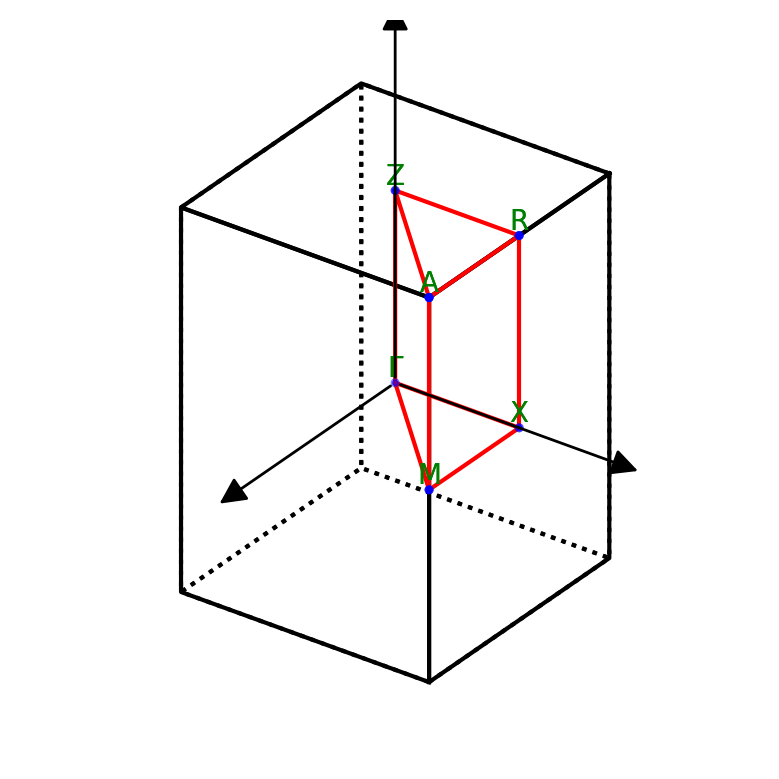

In [5]:
atoms.cell.get_bravais_lattice().plot_bz()

In [10]:
atoms.cell.get_bravais_lattice().get_special_points()

{'G': array([0, 0, 0]),
 'A': array([0.5, 0.5, 0.5]),
 'M': array([0.5, 0.5, 0. ]),
 'R': array([0. , 0.5, 0.5]),
 'X': array([0. , 0.5, 0. ]),
 'Z': array([0. , 0. , 0.5])}

In [22]:
from ase.dft.bz import bz_plot

ValueError: not enough values to unpack (expected 2, got 1)

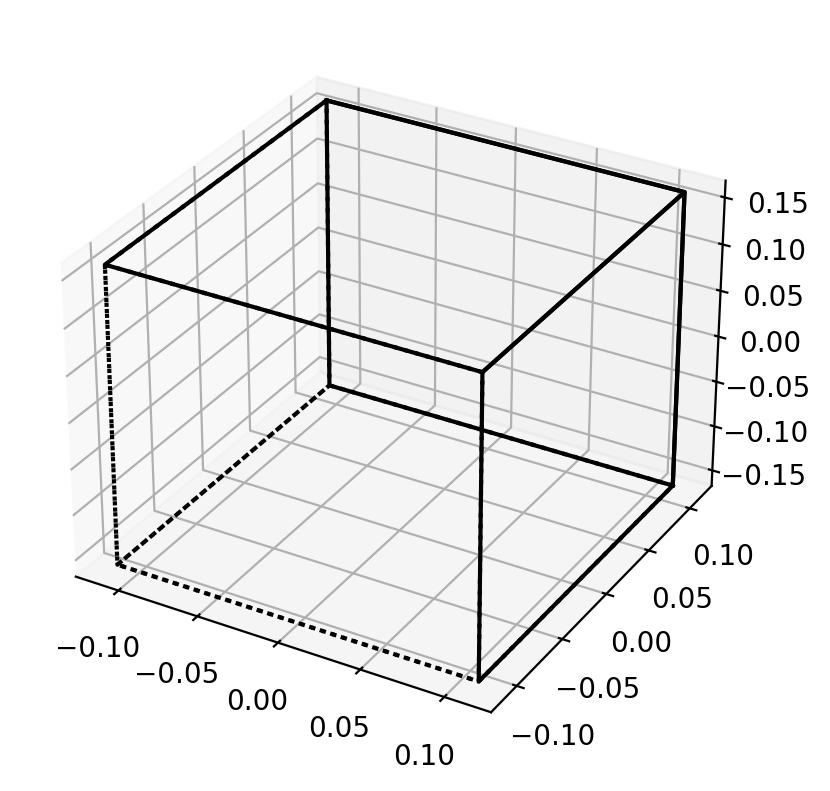

In [25]:
bz_plot(atoms.cell, paths='GZ')

In [13]:
surf = ase.build.surface(atoms, (1,1,0), 1)
#ase.visualize.view(surf)

In [14]:
help(surf.cell.get_bravais_lattice().plot_bz)

Help on method plot_bz in module ase.lattice:

plot_bz(path=None, special_points=None, **plotkwargs) method of ase.lattice.RECT instance
    Plot the reciprocal cell and default bandpath.



In [15]:
import numpy as np

class LinearScalingTransform:
    def __init__(self, scaling_factors):
        """
        Initialize the linear scaling transform.

        Parameters
        ----------
        scaling_factors : tuple of float
            Scaling factors for each axis.
        """
        self.scaling_factors = scaling_factors

    def apply(self, coords):
        """
        Apply the linear scaling transformation.

        Parameters
        ----------
        coords : np.ndarray
            Input coordinates to be transformed.

        Returns
        -------
        transformed_coords : np.ndarray
            Transformed coordinates.
        """
        return coords * self.scaling_factors


In [16]:
help(surf.cell.get_bravais_lattice().plot_bz)

Help on method plot_bz in module ase.lattice:

plot_bz(path=None, special_points=None, **plotkwargs) method of ase.lattice.RECT instance
    Plot the reciprocal cell and default bandpath.



In [17]:
from ase.dft.bz import bz_plot

In [18]:
? bz_plot

Signature:
 bz_plot(
    cell: ase.cell.Cell,
    vectors: bool = False,
    paths=None,
    points=None,
    azim: Optional[float] = None,
    elev: Optional[float] = None,
    scale=1,
    interactive: bool = False,
    transforms: Optional[list] = None,
    repeat: Union[Tuple[int, int], Tuple[int, int, int]] = (1, 1, 1),
    pointstyle: Optional[dict] = None,
    ax=None,
    show=False,
    **kwargs,
)
Docstring:
Plot the Brillouin zone of the Cell

Parameters
----------
cell: Cell
    Cell object for BZ drawing.
vectors : bool
    if True, show the vector.
paths : list[tuple[str, np.ndarray]] | None
    Special point name and its coordinate position
points : np.ndarray
    Coordinate points along the paths.
azim : float | None
    Azimuthal angle in radian for viewing 3D BZ.
elev : float | None
    Elevation angle in radian for viewing 3D BZ.
scale : float
    Not used. To be removed?
interactive : bool
    Not effectively works. To be removed?
transforms: List
    List of linear

<Axes: >

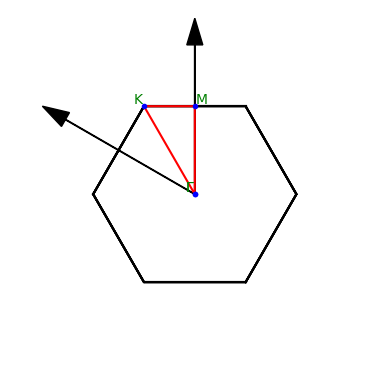

In [5]:
import ase
from ase.lattice import HEX2D
from scipy.spatial.transform import Rotation

lat = HEX2D(3.5)
r = Rotation.from_rotvec([0, 0, 60], degrees=True)
lat.plot_bz(transforms=[r])

In [8]:
help(ase.dft.kpoints.kpoint_convert)

Help on function kpoint_convert in module ase.dft.kpoints:

kpoint_convert(cell_cv, skpts_kc=None, ckpts_kv=None)
    Convert k-points between scaled and cartesian coordinates.

    Given the atomic unit cell, and either the scaled or cartesian k-point
    coordinates, the other is determined.

    The k-point arrays can be either a single point, or a list of points,
    i.e. the dimension k can be empty or multidimensional.



In [12]:
lat.tocell()

Cell([[3.5, 0.0, 0.0], [-1.75, 3.031088913245535, 0.0], [0.0, 0.0, 0.0]])

In [13]:
kpts = lat.get_special_points()
for i, kpt in kpts.copy().items():
    print(ase.dft.kpoints.kpoint_convert(lat.tocell(), skpts_kc=kpt))

[0. 0. 0.]
[0.8975979  0.51822839 0.        ]
[0.5983986  1.03645678 0.        ]


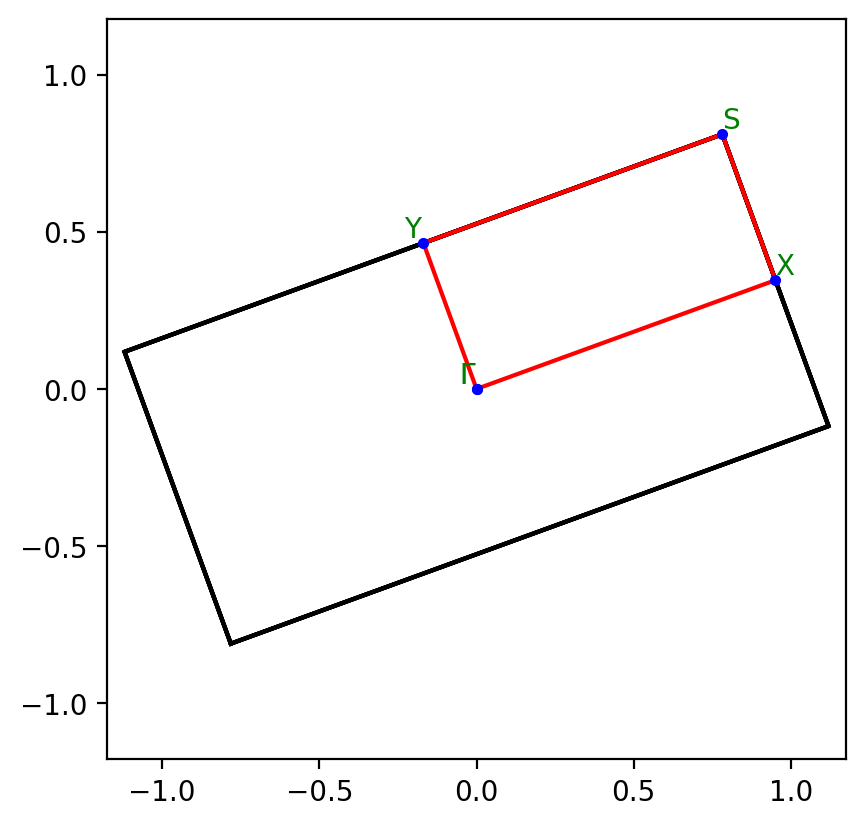

In [46]:
from scipy.spatial.transform import Rotation
r = Rotation.from_rotvec([0, 0, 20], degrees=True)
l = LinearScalingTransform((2*np.pi,2*np.pi,1))

surf.cell.get_bravais_lattice().plot_bz(path='GXSYG', vectors=False, transforms=[r,l], )
ax = plt.gca()
ax.set_axis_on()

In [34]:
surf2 = surf.copy()

In [35]:
surf2.rotate(a=45, v=(0,0,1), rotate_cell=True)

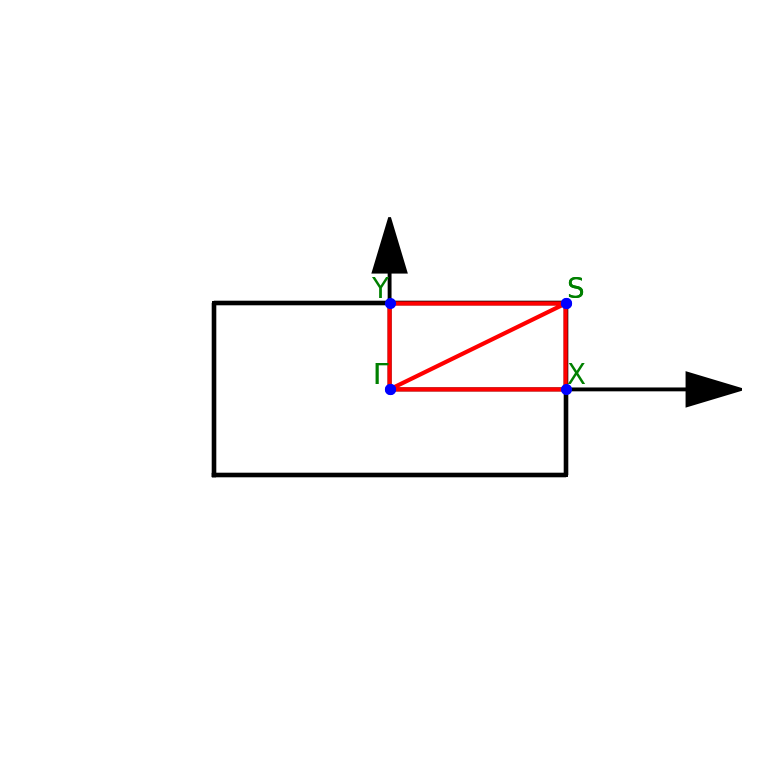

<Axes: >

In [36]:
surf2.cell.get_bravais_lattice().plot_bz(show=True)

In [39]:
kpts = surf.cell.get_bravais_lattice().get_special_points()

In [38]:
kpts = surf2.cell.get_bravais_lattice().get_special_points()

In [41]:
kpts

{'G': array([0, 0, 0]),
 'X': array([0.5, 0. , 0. ]),
 'S': array([0.5, 0.5, 0. ]),
 'Y': array([0. , 0.5, 0. ])}

In [40]:
for i, kpt in kpts.copy().items():
    print(ase.dft.kpoints.kpoint_convert(surf.cell, skpts_kc=kpt))
    # kpts = ase.dft.kpoints.kpoint_convert(struct.cell, skpts_kc=special_kpts[i])  # Convert k-point to inv. Angstrom
    # kpts[np.abs(kpts) < 1e-10] = 0  # Chop very small values (numerical noise)

[0. 0. 0.]
[0.49400495 0.         0.        ]
[0.49400495 1.01181766 0.        ]
[0.         1.01181766 0.        ]


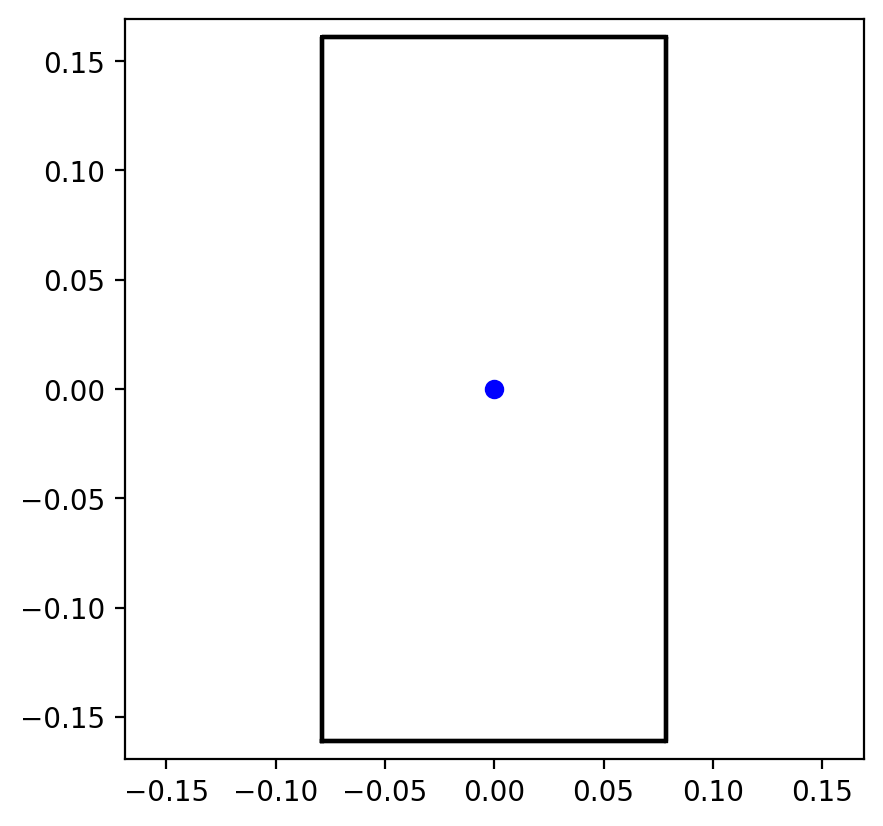

In [42]:
bz_plot(surf.cell, repeat=(1,1,), points=surf.cell.get_bravais_lattice().get_special_points_array())
ax = plt.gca()
ax.set_axis_on()

<Axes: >

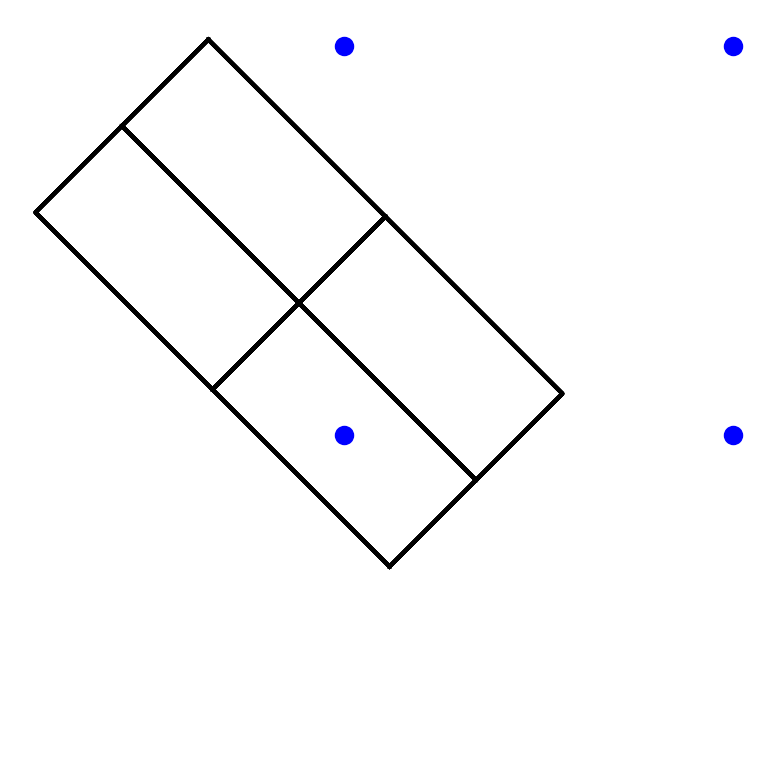

In [19]:
bz_plot(surf2.cell, repeat=(2,2,), points=surf2.cell.get_bravais_lattice().get_special_points_array())

In [45]:
atoms = ase.io.read(os.path.join(pks.opts.FileIO.path, 'Sr214.cif'))

/Users/philking/miniconda3/envs/peaks-dev/lib/python3.12/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(139, setting=1). This may result in wrong setting!
  warnings.warn(


In [46]:
surf = ase.build.surface(atoms, (0,0,1), 1)

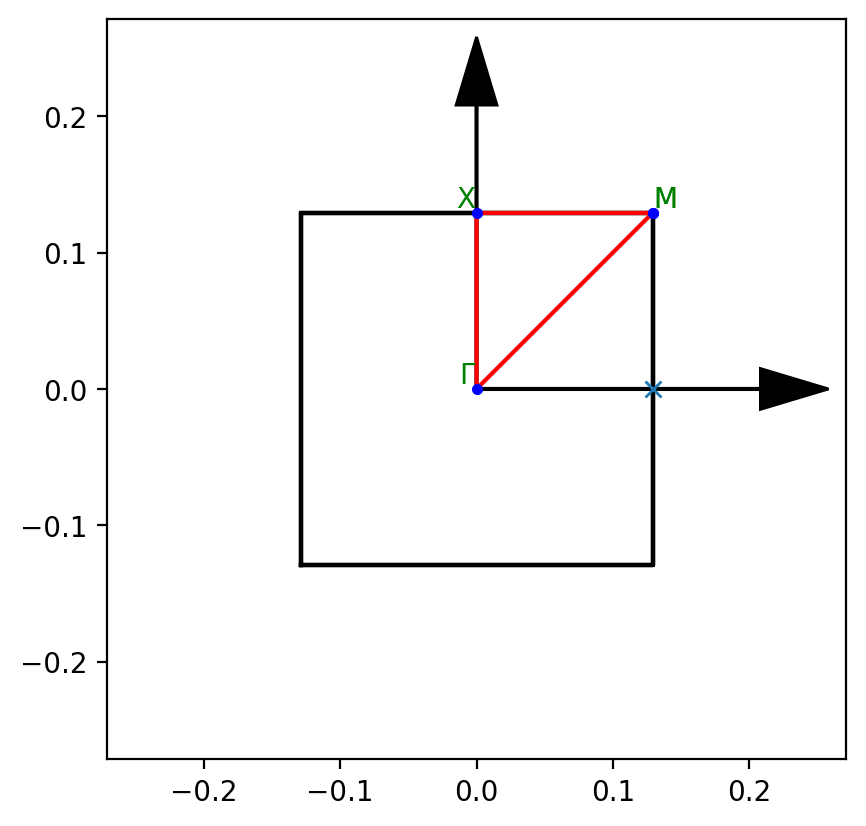

In [68]:
surf.cell.get_bravais_lattice().plot_bz(show=False)
ax = plt.gca()
ax.set_axis_on()
plt.plot(0.811152255/(2*np.pi),0,'x')

In [66]:
0.811152255/0.129

6.2880019767441855

In [49]:
kpts = surf.cell.get_bravais_lattice().get_special_points()
kpts

{'G': array([0, 0, 0]),
 'M': array([0.5, 0.5, 0. ]),
 'X': array([0. , 0.5, 0. ])}

In [50]:
for i, kpt in kpts.copy().items():
    print(ase.dft.kpoints.kpoint_convert(surf.cell, skpts_kc=kpt))
    # kpts = ase.dft.kpoints.kpoint_convert(struct.cell, skpts_kc=special_kpts[i])  # Convert k-point to inv. Angstrom
    # kpts[np.abs(kpts) < 1e-10] = 0  # Chop very small values (numerical noise)

[0. 0. 0.]
[0.81115225 0.81115225 0.        ]
[0.         0.81115225 0.        ]


Basically want to load structure file via ASE or pymatgen and get ASE Atoms object. Then have some base methods:
- `plot_sbz(struct, surf=(001), rotate=0, ...)` to plot the surf BZ, with repeats and possible rotation
- `plot_bzslice(struct, surf=(001), k_perp=0, rotate=0, ...)` to plot a slice through a bulk BZ
- `plot_bz(struct)` to basically mirror the ASE fn

Instead of passing struct, also make it possible to pass a simple e.g. `hex`, `square` or similar, or maybe just the Bravis lattice from ASE directly?

Then need a couple of cut planner methods
